<a href="https://colab.research.google.com/github/HarryWang0619/Quantum-Computing/blob/main/Harry_Lab_1_Quantum_states_and_the_Bloch_sphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 397 QC

## Introduction to Quantum Computing – Spring 2022

Instructor – Professor Robert Niffenegger (rniffenegger@umass.edu ) Marcus 215B

Lectures - Monday, Wednesday – Marston Hall room 211 

Labs - Friday - Engineering Lab 307

Time – MWF 12:20-1:10

Teaching Assistant – Ivan Williams ( inwilliams@umass.edu ) 


---


Introduction to quantum computation will cover:
Quantum optics, wave particle duality and single particle interference and coherence of photons. Interaction of light and matter, atomic physics, atomic states, and transitions. 
Survey of qubit modalities: photonics, neutral atoms, trapped ions, Transmons. 
Single qubit control: Rabi oscillations, Bloch Sphere, Ramsey pulses, spin echoes. 
Entanglement generation: photons, trapped ions, Bell states.
Quantum Circuits and Algorithms: Grover, Deutsch, Shor

### Labs will be every Friday

Initial programs will be simulations of single qubit operations such as Rabi and Ramsey pulse sequences and then entanglement of two qubits and bell state generation. This will allow us to construct quantum circuits from fundamental quantum mechanical interactions, effectively seeing into the ‘black box’ of quantum circuits. Finally, in the second half of the course we will program simulations of quantum algorithms by Grover and Shor using the Qiskit and QuTIP python libraries. 

> Prerequisites: 	ECE 213 (Signals) & ECE 214 (Statistics)

### Textbook
>Quantum Computation and Quantum Information , Authors:	Michael A. Nielsen, Isaac L. Chuang



##Supporting Materials: 

### Quantum Optics:

•	Ivan H. Deutsch’s Notes
http://info.phys.unm.edu/~ideutsch/Classes/Phys566F21/ 

•	Daniel Steck’s Notes
https://atomoptics.uoregon.edu/~dsteck/teaching/quantum-optics/

###Quantum Computation:

•	Thomas Wong’s Textbook:
https://www.amazon.com/Introduction-Classical-Quantum-Computing-Thomas-dp-B09QP2MYYM/dp/B09QP2MYYM/

http://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e.pdf

•	IBM’s Qiskit Textbook - https://qiskit.org/textbook-beta 


#How to use this Notebook

1. Create a copy for you to edit and update the filename with your UMass username. 

2. Experiment! This notebook is just a starting point for you to explore. If you have ideas for things to try start by typing out the pseduo code first then see if you can find help to get the syntax and libraries to make it work. 

3. Teamwork. Working in teams will help everyone check their code and debug errors. Please work in groups of up to three people. You may all share code but please maintain your own copy of the notebook to turn in for credit.

4. Hand written paper notebook still required. This colab notebook is a supplement to a paper notebook and the textbooks listed above. To test out ideas, check mathematical relations and linear algebra proofs and to complete exercises you will need a real physical paper notebook to do your work. Please have one and a pen/pencil handy. 
Related: Be careful not to get bogged down in the code if it is not working. Reach out to your team, the TA or me to get assistance. 

5. Programming Resources: 
  *   https://colab.research.google.com/notebooks/basic_features_overview.ipynb
  *   https://www.dataquest.io/blog/jupyter-notebook-tutorial/
  *   https://www.youtube.com/watch?v=inN8seMm7UI 
  *   https://nbviewer.ipython.org/github/qutip/qutip-notebooks/blob/master/examples/qubit-dynamics.ipynb
  * FYI: Colab provides hardware acceleration with GPUs and TPUs if you go to 'Runtime>Change Runtime type'




# QuTiP

All labs will be run in the colaboratory Jupyter notebook like this one. 

To get started we first need to install the Quantum Toolbox in Python (QuTiP) using 'pip' within Colab. 

(Any library not native to Colab can be installed this way.)

In [ ]:
try:
  import qutip
except ImportError:
  print('Install Qutip')
  !pip install qutip


In [ ]:
import qutip; print(qutip.__version__)

4.6.3


#Qiskit

IBM's Quantum Information Software Kit

In [ ]:
try:
  import qiskit
except ImportError:
  print('Install Qiskit')
  !pip install -q qiskit
  !pip install -q qiskit[visualization]

In [ ]:
import qiskit; print(qiskit.__version__)

0.19.2


Matplotlib (Library) - MATLAB like plotting for python

In [ ]:
'''
If plots of the Bloch sphere are not working you may have to revert the matplotlib back to 3.4.0

Qutip doesn't work with matplotlib 3.5
Qiskit doesn't work with matplotlib 3.4.3 

Requires uninstall and then install of matplotlib.__version__ == '3.4.0'

'''

try:
  import matplotlib
  print(matplotlib.__version__)
except ImportError:
  print('Install Matplotlib')

if matplotlib.__version__ > '3.4.0':
  print ("Need to downgrade matplotlib to work with Qutip and Qisket")
  !pip uninstall matplotlib
  !pip install matplotlib==3.4.0
  import matplotlib ;  print(matplotlib.__version__)

3.2.2


In [ ]:
'''
Kaleidoscope plots Bloch spheres for Qisket 
'''
try:
  import kaleidoscope
except ImportError:
  print('Install kaleidoscope')
  !pip install -q kaleidoscope
import kaleidoscope; print(kaleidoscope.__version__)

0.0.13.dev13+42e3c1f


Initialize and import libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, sin, cos
plt.style.use('dark_background') #background

#QUTIP
import qutip as qt
from qutip import *
from qutip.qip import *
from qutip import qeye, tensor, destroy, fock_dm

#QISKIT
from qiskit.quantum_info import Statevector


Coding preamble complete


#Quantum States

In lecture we discussed how the possible paths of photons can be thought of as qubits. 

We saw how a beamsplitter can put a photon into a superposition of taking two paths at once. Further, these two paths interfere, for **single** photons.

> https://en.wikipedia.org/wiki/Linear_optical_quantum_computing#Elements_of_LOQC

Another very important physical representation of a qubit is the spin of the electron which can be 'up' or 'down'. 
So instead of a photon being in a superposition of taking both path A *and* path B. The electron can take a path where it experiences being spin 'up' and a path where it experiences being spin 'down'. 

path A or path B $ ⇒  \langle \uparrow | $ or $ \langle ↓| $ 

Like the path of the photon, when we interfere these paths together we get only one output. Instead of the single photon being required to come out of either port 1 or port 2 of the final beam splitter, the electron must end up in spin up or spin down. This is because like a photon, the electron behaves like a wave eventhough it is a particle.

These two spin states of the electron are created by the quantized magnetic dipole moment of the electron referred to as the Bohr magneton. 

${\displaystyle \mu _{\mathrm {B} }={\frac {e\hbar }{2m_{\mathrm {e} }}}}$

In the presence of an external magnetic field the electron aligns it's 'up/down' axis (a vector in real space) with the magnetic field vector of external field. Simliar to how a bar magnet would orient itself with the earths magnetic field to minimize the local magnetic field and minimize energy. 

However, unlike a bar magnet, the electron is only ever up or down due to the quantization of the electron spin. So the electron is never 'sideways' or partially up/down. 

### It is either up or it is down. 

However, this doesn't mean that it can't have equal probabilities of being in the up state and down state, a superposition state. As we'll see the electron can have an equal probability of being up and down before we measure it ***but*** once we measure it, it is either up or it is down and if we measure it again (in the same manner) we expect to get the same result again and again. This was confirmed by the famous, Stern-Gerlach experiment.

>There are indeed many 'two-level' quantum systems like this and almost all qubits rely on the ability to confine quantum systems to just two 'paths' or states per qubit. For all of them the general rules that follow are the same.



In [ ]:
'''
This lab uses QuTiP = Quantum Toolbox in Python

It has predefined object classes for quantum states.

So while we could define the vectors that describe the quantum states from scratch, we will start using these prepackaged functions.

'''

print(spin_state(1/2, +1/2)) # Spin 'up'

print (spin_state(1/2, -1/2)) #Spin 'down'

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


What are these 'states'? 
They are unit vectors

Let's create a state psi0 ($\Psi_0$) 

We can arbitrarily initialize it in either the 'up' or the 'down' vector state.

$|{\uparrow} \rangle = |0 \rangle = \begin{pmatrix}{1}\\{0}\end{pmatrix}=\left\vert {s_{z}{=}{+\textstyle {\frac {1}{2}}}}\right\rangle $

$|{\downarrow} \rangle = |1\rangle = \begin{pmatrix}{0}\\{1}\end{pmatrix}
=\left\vert {s_{z}{=}{-\textstyle {\frac {1}{2}}}}\right\rangle $

(https://en.wikipedia.org/wiki/Spin-1/2)

> It might be helpful to remember that the 'up' state is '0' recalling python indexing starts with '0'. (Indeed binary as well)

In [ ]:
'''
QuTiP Syntax: 
outputstate = spin_state( total spin of the basis , eigenvalue of desired output state )
https://qutip.org/docs/latest/apidoc/functions.html?highlight=spin_state#qutip.states.spin_state 
'''


# pz = plus Z for plus spin along Z
pz = spin_state( 1/2, +1/2) # i.e. the column vector (1,0)
print(pz)

# Altenatively, we can request the function to return the 'down' state by requesting the state with a different eigenvalue (in this case negative 1/2).
# mz = minus Z for negative spin along Z
mz = spin_state( 1/2, -1/2) #the column vector (0,1)
print(mz)


# Equivalently we can define the number of states in the basis as 2 and ask for each state 0 and 1 within that basis
pz = basis(2,0) # i.e. another way to get the column vector (1,0)
print(pz) 

mz = basis(2,1) # i.e. another way to get the column vector (0,1)
print(mz) 


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


The fact that we could define this same quantum state vector in equivalent ways starts to hint at the complexity but also the similarity of different physical quantum systems. For now it is enough to imagine we're dealing with a single electron spin which can either be oriented up or down much like the faces of a coin. What is interesting is that many other systems that have just two states operate with nearly identical rules which we will get to later.

In [ ]:
''' 
Altenatively, we can request the function to return the 'down' state by requesting the state with a different eigenvalue (in this case negative 1/2).
'''
mz = spin_state( 1/2, -1/2)

print(mz)


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


In [ ]:
'''
We can also define the vectors just using numpy arrays

However, if we define the vectors by hand we'll need to be careful that they normalize to a total probabily of 1.
This sounds silly but we never want a probabilty of a state existing to be greater than 100% and often care needs to be taken to 'renormalize' the state to do so.

Qutip has a method for renormalization of state objects '.unit()'
Which is one reason why we'll use it's definition of the state object instead of defining our vectors manually like this.
'''

import numpy as np

ket0 = np.array([[1],[0]])

ket1 = np.array([[0],[1]])

print(ket0)

# print(ket1)

[[1]
 [0]]


#Basis States

These two vectors create what is known as an orthogonal set of basis states which in combination can create all of the other vectors to describe the state of the electron (qubit). Note that there are no negative numbers in the down 'state'. 'Down' is a new unit vector that points in a totally new direction and is orthogonal to the 'up' vector. It is not just the negative of the 'up' state. 

(Like how the unit vectors $\hat x$ and $\hat y$ are orthogonal in Cartesian coordinates)

> Exercise: Verify that the two vectors for 'up' and 'down' are orthogonal by multiplying them together to project them onto each other.

However, if we ask what the value of the state is along a particular direction. For instance, we could ask what the spin of the electron is along the direction of spin that we have defined it to be. THEN we project the vector and measure it's expectation value. Which would be up or down, +1/2 or -1/2. In this case down (-1/2) getting back the negative that we put in to define the state in the first place. This is similar to how vectors are projected onto each other by the dot product.



# Linear Algebra

It is important to emphasize that the rules that follow about quantum states and measurements of quantum states are described by linear algebra (which is always good to review). Where the quantum state is an **eigenstate** and the measurement values (energies) are the corresponding **eigenvalues**.

https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Schr%C3%B6dinger_equation 

Also the multiplication of row vectors and column vectors and matrix multiplication will be fundamental as our state vectors are row and column vectors. 


$|{\uparrow} ⟩ = |0⟩ = \begin{pmatrix}{1}\\{0}\end{pmatrix} $

$|{\downarrow}⟩ = |1⟩ = \begin{pmatrix}{0}\\{1}\end{pmatrix} $

## 'Bra' 'Kets'

To distinguish if our state vector is a row vector or column vector we'll use 'bra-ket' notation. 

With column vectors represented by 'kets' $|0⟩ = \begin{pmatrix}{1}\\{0}\end{pmatrix}$

and 'bras' representing row vectors $ ⟨0| = \begin{pmatrix}1 & 0 \end{pmatrix}$



# The Bloch Sphere

State vectors can be plotted in 3D on a unit sphere. 

Like the probability of a particle existing always being one, the radius of the sphere will be 1 just like the unit circle in 2D.

### The up state:

In [ ]:
psi0 = spin_state( 1/2, +1/2) # Initialize the 'up' state
print(psi0)


'''
plot with Qutip
'''
# b = Bloch() #create Bloch sphere
# b.font_color = 'white'
# b.vector_color = 'white'
# b.add_states(psi0) # add our quantum state to the sphere
# b.show() # plot the sphere with the quantum state

'''
plot with Qiskit (and kaleidoscope)
'''
from kaleidoscope import bloch_sphere
sv = psi0
bloch_sphere(Statevector(sv.dag().full()[0]))


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


### The down state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


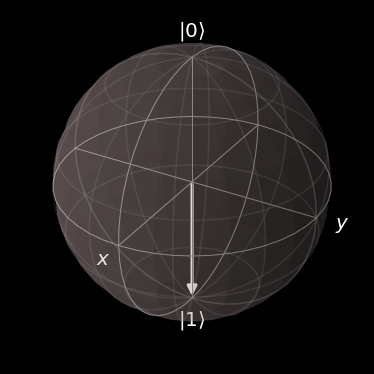

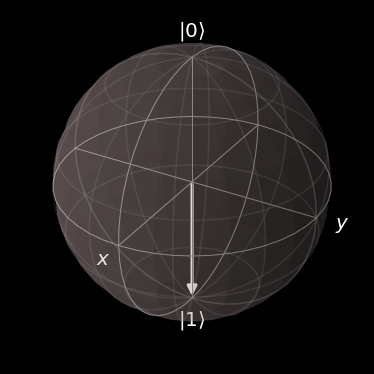

In [ ]:

psi0 = spin_state( 1/2, -1/2) # Initialize the 'down' state
print(psi0)

'''
plot with Qutip
'''
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = 'white'
b.add_states(psi0) # add our quantum state to the sphere
b.show() # plot the sphere with the quantum state

'''
plot with Qiskit (and kaleidoscope)
'''
sv = psi0
bloch_sphere(Statevector(sv.dag().full()[0]))


It is important to see here that the usual representation of orthogonal vectors like the up and down state, being perpindicular has been changed. Instead the up and down state are at opposite ends of the bloch sphere, the north and south poles. We'll come back to this and we will see soon what the orthogonal directions represent.

For now it is important to see that each pole represents each state |0⟩=North, |1⟩=South. The closer the vector on the sphere is to each pole the more likely it is to be in that state.


# Coupling states (transitions)

How do we transform these two states into each other?

Well let's start by using the outer product to construct matrices which connect different states (https://en.wikipedia.org/wiki/Outer_product)

First  $|0⟩⟨0| = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \begin{pmatrix}1 &  0\end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}$

However let's say we wanted to construct a matrix that took us from |0⟩ to |1⟩?
We'd calculate the outer product:
$|1⟩⟨0| = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \begin{pmatrix}1 &  0\end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 1 & 0 \end{pmatrix}$

Now if we start in |0⟩ and apply the operator |1⟩⟨0|.

$|1⟩⟨0|0⟩ = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \begin{pmatrix}1 &  0\end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1⟩ $

Equivalently (and much more conveniently) we can use the identity that a vector inner product with itself is one :

## $ ⟨0|0⟩ = 1  = \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix}1 \\  0\end{pmatrix} = 1$ 

So we don't need to bother with the matrix multiplication. 
The complement to this identity is that the basis states are othogonal and therefore their inner product is zero:

## $⟨0|1⟩ = 0 $

> These identities are extremely important and handy 'tricks'

To construct an operator that can flip any state (|0⟩ to |1⟩ AND |1⟩ to |0⟩) we add the outer product |1⟩⟨0|.

$|0⟩⟨1| = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \begin{pmatrix}0 &  1\end{pmatrix} = \begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix}$

$|0⟩⟨1| + |1⟩⟨0|= \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = \sigma_x$

## This X operator is logically equivalent to a NOT operation on the qubit state.
 It flips the qubit from 1 to 0 or 0 to 1. 
 Physically it flips the spin from up to down and down to up! It is the single qubit X gate.

 **Exercise**: Try out the NOT operator on both the |0⟩ and |1⟩ states. Show your work.

---

 ### Dagger operator †  (note on complex numbers)

We ignored complex numbers above, because our example didn't have any. However, generally when we turn a 'bra' into a 'ket' and (vice versa) we must not only transpose the vector, we must also complex conjugate the vector as well. This combination conjugate and transpose (aka 'adjoint') operation is represented by a 'dagger' †.  Generally we need to construct outer products with † operators not just transpose so that we take the complex conjugate also.


In [ ]:
'''
Verify the outerproduct matrices by multiplying the states together.
Remember you need to take the transpose AND the complex conjugate of the vector
This operation is referred to as a 'dagger' operator and is a method on QuTIP states called .dag()
'''
# |0⟩
pz = spin_state( 1/2, +1/2)
# |1⟩
mz = spin_state( 1/2, -1/2)

print ( pz )

print ( pz.dag() )


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1. 0.]]


In [ ]:
# What does this represent?
print(mz.dag())
print ( pz * mz.dag() )
# Answer: This represent change the |1> to |0>

# And this?
print ( mz * pz.dag() )
# Answer: This represent This represent change the |0> to |1>

# Check what |0⟩⟨1| + |1⟩⟨0| = ?
s_x = pz * mz.dag() + mz * pz.dag()
print (s_x)

# Does it equal sigma x?
print (sigmax() == s_x)

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[0. 1.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
True


In [ ]:
# Try out the outer product on a state and verify that is flips the state
#  |1⟩⟨0|0⟩ = ?
# Answer: Shouggfld be |1⟩, because |1⟩⟨0| change |0⟩ to |1⟩ and we have |0⟩ as the original state. 

print ( mz * pz.dag() * pz )
# print ( zm )

# What does ⟨0|0⟩ = ?
print( pz.dag() * pz )
print( ' ⟨0|0⟩ = 1 ')


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]
 ⟨0|0⟩ = 1 


# First single qubit gate with Qiskit

Let's create our first circuit using the X gate (NOT) gate on a qubit.

In [ ]:
'''
Initial state |0⟩
'''
psi0 = spin_state( 1/2, +1/2)
sv = psi0

#Plot on the Bloch sphere
bloch_sphere(Statevector(sv.dag().full()[0]))

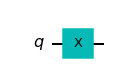

In [ ]:
'''
Single qubit gate with Qiskit
'''
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.quantum_info import Statevector

# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(1)

# Add an X gate on qubit 1
qc.x(0)

# Draw the circuit
qc.draw('mpl')


In [ ]:
# Trying out just for fun
qc2 = QuantumCircuit(3)
qc2.x(0)
qc2.z(2)
qc2.h(2)
qc2.draw()

┌───┐     
q_0: ┤ X ├─────
     └───┘     
q_1: ──────────
     ┌───┐┌───┐
q_2: ┤ Z ├┤ H ├
     └───┘└───┘

In [ ]:
print(qc)

   ┌───┐
q: ┤ X ├
   └───┘


In [ ]:
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_bloch_multivector
# import kaleidoscope.qiskit
from kaleidoscope import bloch_sphere

sim = QasmSimulator() #Set simulator to evolve state

# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(1)

# Add an X gate on qubit 1
qc.x(0)

compiled_circuit = transpile(qc, sim) #Compile quantum circuit
qc.save_statevector() #Save the state vector after simulation

'''
Run the simulation
'''
job = sim.run(qc, shots=100)
#Plot final states on Bloch spheres
# plot_bloch_multivector(job.result().get_statevector(qc)) #error with matplotlib
bloch_sphere(job.result().get_statevector(qc))

In [ ]:
bloch_sphere(Statevector(sv.dag().full()[0])) ## Original state

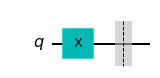

In [ ]:
qc.draw('mpl')

Qubit initialized to |0⟩ and applying the X gate (NOT gate) flips it to |1⟩ as expected

---

### Fundamental hardware beneath the abstraction

Part of our journey now will be to peel away this abstraction layer to the more fundamental quantum hardware. 

What is going on inside that box marked 'X'?



---

#Halfway point for Lab 1

---

# Coupling states with rotation

How do we smoothly transition between these two states?
We've seen that we can construct operators using outerproducts but the NOT operator is discrete, flipping the state entirely.

Naively, we may suppose that rotating the state vector about this sphere will transition us from one state (down) to the other state (up) smoothly. And we'd be right!

We shall see later that this is true more explicitly, but it does turn out that coupling these two states together is equivalent to a rotation about the Bloch sphere.

Generally for any axis P = {X,Y,Z}

\begin{aligned}
R_{p}(\theta )&=e^{(-i\theta P/2)}=\cos(\theta /2)I-i\sin(\theta /2)P \end{aligned}

Which follows from Euler's formula:

$e^{i\theta}=\cos \theta+i\sin \theta$


We can choose to rotate states on the Bloch sphere about any of the axes (X,Y,Z). However, if we want to rotate from one state (in the Z basis) to another state(in the Z basis) then we must pick an axis other than Z (since that will trivially not change the probability of finding the qubit in each state. To rotate the state from one to the other we must rotate about either the 'X axis' or the 'Y axis'. 


Generically for any axis P = {X,Y,Z} on the Bloch Sphere:

\begin{aligned}
R_{p}(\theta )&=e^{(-i\theta P/2)}=\cos(\theta /2)I-i\sin(\theta /2)P \end{aligned}

##Pauli Matrices
\begin{aligned}
\sigma _{x}={\begin{pmatrix}0&1\\1&0\end{pmatrix}},\quad \sigma _{y}={\begin{pmatrix}0&-i\\i&0\end{pmatrix}},\quad \sigma _{z}={\begin{pmatrix}1&0\\0&-1\end{pmatrix}}
\end{aligned}

The rotations of the Bloch sphere about the Cartesian axes in the Bloch basis are then given by:

\begin{aligned}R_{x}(\theta )&=e^{(-i\theta X/2)}=\cos(\theta /2)I-i\sin(\theta /2)X={\begin{bmatrix}\cos \theta /2&-i\sin \theta /2\\-i\sin \theta /2&\cos \theta /2\end{bmatrix}}\\R_{y}(\theta )&=e^{(-i\theta Y/2)}=\cos(\theta /2)I-i\sin(\theta /2)Y={\begin{bmatrix}\cos \theta /2&-\sin \theta /2\\\sin \theta /2&\cos \theta /2\end{bmatrix}}\\R_{z}(\theta )&=e^{(-i\theta Z/2)}=\cos(\theta /2)I-i\sin(\theta /2)Z={\begin{bmatrix}e^{-i\theta /2}&0\\0&e^{i\theta /2}\end{bmatrix}}\end{aligned}

## Example - rotations about the X basis

\begin{aligned}
R_{x}(\theta )&=e^{(-i\theta X/2)}=\cos(\theta /2)I-i\sin(\theta /2)X={\begin{pmatrix}\cos \theta /2&-i\sin \theta /2\\-i\sin \theta /2&\cos \theta /2\end{pmatrix}}\end{aligned}

If we want to rotate by $\pi$ about $X$ then this becomes

\begin{aligned}
R_{x}(\pi )&=e^{(-i\pi X/2)}=\cos(\pi /2)I-i\sin(\pi /2)X =-iX= - i {\begin{pmatrix}0 &1\\1& 0 \end{pmatrix}}\end{aligned}

(Notice that this rotation causes the vector to become complex.)

We'll see below that this evolution (rotation) of the state (vector) is dictated by the time dependent Schrodinger equation. But first let's try a rotation. 

>Note a factor of two that enters. Rotation on the Bloch sphere happens 'twice' as fast because the rotation to the othogonal vector within the same basis is not just $\pi/2$ like on the unit circle but $\pi$ on the Bloch sphere. More on this below.

In [ ]:
from qutip.qip.operations import rx, ry, rz
'''
#QuTiP built in single qubit gate operations 
RX, RY, RZ and more...
'''
print(rx(pi)) #Rotation matrix about the x axis by full pi flip

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00-1.j 6.123234e-17+0.j]]


In [ ]:
psi0 = spin_state( 1/2, +1/2) # Initialize the 'up' state

print ('Initial state')
print(psi0)
print ('\n Initial expectation value along Z')
print(expect(sigmaz(),psi0))

#Define the Rotation matrix
R = rx(pi*1)
print ('\n Rotation Matrix')
print (R)

#Apply rotation
psi1 = R * psi0
print ('\n Rotated state')
print(psi1)

# print ('\n Final expectation value along Z')
# print(expect(sigmaz(),psi1))

Initial state
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

 Initial expectation value along Z
1.0

 Rotation Matrix
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00-1.j 6.123234e-17+0.j]]

 Rotated state
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.+0.j]
 [0.-1.j]]


Exercise: Verify by hand that this rotation transforms the state $|\uparrow⟩ = \begin{pmatrix}{1}\\{0}\end{pmatrix}$ into $\begin{pmatrix}{0}\\{-i}\end{pmatrix}$. Show your work.

Q: Why isn't it $\begin{pmatrix}{0}\\{1}\end{pmatrix}$?

A: We have acquired a global phase during the rotation. 

Notice that if we rotate a further $\pi$ we rotate back to $\begin{pmatrix}{-1}\\{0}\end{pmatrix}$. It is not until we complete another loop around the Bloch sphere (2 loops total) that we come back to the initial state exactly.

This is again related to the Bloch sphere having twice as much rotation. While we think we've gone all the way around with a 2$\pi$ rotation, we've actually only flipped our initial state.

Let's compare to a traditional unit circle with unit vectors that look more like $\hat x$ and $\hat y$ for |0⟩ and |1⟩.

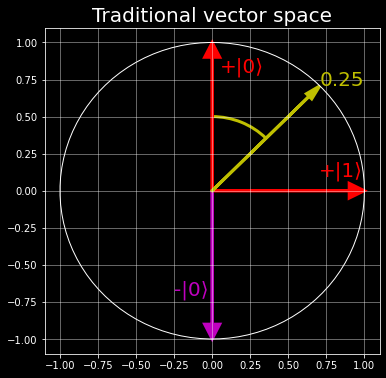

In [ ]:
'''
Setup a Unit Circle plot
'''
# plt.figure(figsize=(6,6)) #Create figure for plot
fig , ax  = plt.subplots(figsize=(6,6))
x = np.linspace(0,2*np.pi,100) # circle perimeter
plt.plot(np.cos(x),np.sin(x),'w', linewidth= 1) #plot circle
plt.grid(alpha=.5)
plt.style.use('dark_background') #background
plt.title('Traditional vector space',fontsize=20)
# ax.set_ylabel('|0>', fontsize=20)
# ax.set_xlabel('|1>', fontsize=20)
plt.arrow(0,0,1,0, linewidth=3,head_width=0.1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
plt.arrow(0,0,0,1, linewidth=3,head_width=0.1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
plt.arrow(0,0,0,-1, linewidth=3,head_width=0.1, head_length=0.1, fc='m', ec='m', length_includes_head = 1)
plt.text(0.05,0.8,'+|0⟩',c='r',fontsize=20)
plt.text(0.7,0.1,'+|1⟩',c='r',fontsize=20)
plt.text(-0.25,-0.7,'-|0⟩',c='m',fontsize=20)

'''
Plot rotation on a traditional unit circle
'''
psi_circle = 0 

# Traditional rotation on unit circle
Rotation = pi*1/4

# Rotate
psi_circle = psi_circle + Rotation

#Plot vector
plt.arrow(0,0,np.sin(psi_circle),np.cos(psi_circle), linewidth=3,head_width=0.05, head_length=0.1, fc='y', ec='y', length_includes_head = 1)
plt.text(np.sin(psi_circle),np.cos(psi_circle),Rotation/pi,c='y',fontsize=20)

#plot arc of rotation
import matplotlib.patches as mpatches
pac = mpatches.Arc([0, 0], 1, 1, angle=0, theta1=90-Rotation*180/pi, theta2=90, linewidth=3, color = 'y')
ax.add_patch(pac)

# ax.axis([-2, 2, -2, 2])
# ax.set_aspect("equal")
# fg.canvas.draw()

plt.show()
fig.savefig('uc_pio4.png')


## Compare to the same rotation on the Bloch Sphere

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]


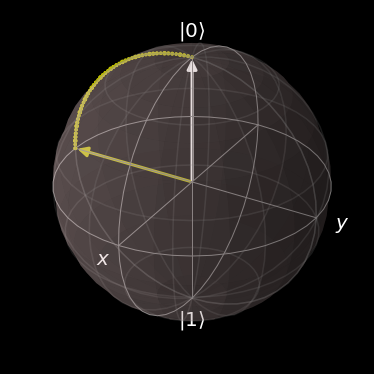

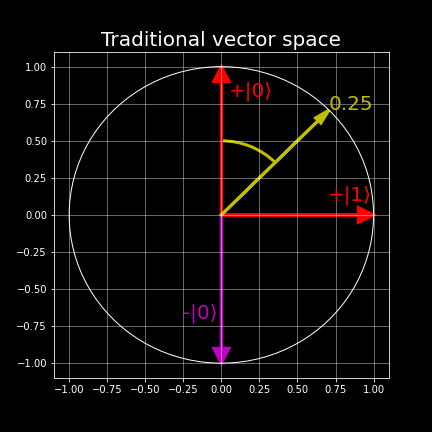

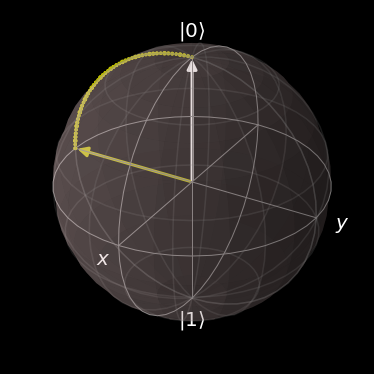

In [ ]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']

# Initialize the 'down' state
psi0 = spin_state( 1/2, +1/2) 
print(psi0)

#Add initial vector to Bloch sphere
b.add_states(psi0)

# Twice as much rotation about the Bloch Sphere
Rotation = pi*1/2 

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation about X axis
  psi1 = rx(Rotation*delta[i]) * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1) 
print(psi1)

b.show()

from IPython.display import Image
Image('uc_pio4.png')

On a traditional unit circle rotation by $\pi/2$ rotates to the other state (e.g. Y to X). 

Then a further $\pi/2$ (total $\pi$) only gets you to the negative direction of Y. Not back to the original positive direction of Y. 

Similarly on the Bloch sphere, when we think we've rotated back to the same spot (the top of the Bloch sphere) we've only completed half of the rotation around this unit circle and that is why we get a negative sign. We're still down! If our state is at a pole of the Bloch sphere it simply means that the state vector is entirely composed of one of the unit vectors, it doesn't tell us which direction we're in! We could be pointing down and up along the same quantization axis and we're still at the top of the Bloch sphere.

To get back 'up' to our original state we must complete an additional rotation on the Bloch sphere just to get back 'up'.

Why is this even a good representation of a qubit then?

Well for the most part what we're interested in is which state the qubit is in and for a single qubit this negative sign is equivalent to a global phase (rotation) that doesn't matter. The global phase only matters relative to other qubits (which we'll get to later). 

> This also means that the Bloch sphere doesn't work well for multiple qubits...

For example:

If we ask a state -|0⟩ a question (we measure it), can we tell if it is negative?

First this negative is equivalent to a phase shift $\pi$ :

$-|0⟩ = e^{i\pi} |0⟩ $

When we calculate the probability $P=⟨0|e^{-i\pi}e^{i\pi}|0⟩= ⟨0|0⟩ = 1$

>Remember that turning a 'ket' into a 'bra' requires complex conjugation. 

The expection values will similarly be the same for $\pm|0⟩$. 

**Exercise: Verify that this is true.**


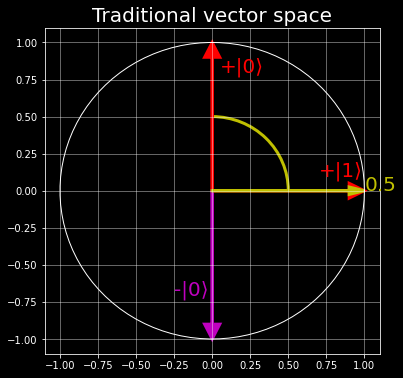

In [ ]:
'''
Setup a Unit Circle plot
'''
# plt.figure(figsize=(6,6)) #Create figure for plot
fig , ax  = plt.subplots(figsize=(6,6))
x = np.linspace(0,2*np.pi,100) # circle perimeter
plt.plot(np.cos(x),np.sin(x),'w', linewidth= 1) #plot circle
plt.grid(alpha=.5)
plt.style.use('dark_background') #background
plt.title('Traditional vector space',fontsize=20)
# ax.set_ylabel('|0>', fontsize=20)
# ax.set_xlabel('|1>', fontsize=20)
plt.arrow(0,0,1,0, linewidth=3,head_width=0.1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
plt.arrow(0,0,0,1, linewidth=3,head_width=0.1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
plt.arrow(0,0,0,-1, linewidth=3,head_width=0.1, head_length=0.1, fc='m', ec='m', length_includes_head = 1)
plt.text(0.05,0.8,'+|0⟩',c='r',fontsize=20)
plt.text(0.7,0.1,'+|1⟩',c='r',fontsize=20)
plt.text(-0.25,-0.7,'-|0⟩',c='m',fontsize=20)

'''
Plot rotation on a traditional unit circle
'''
psi_circle = 0 

# Traditional rotation on unit circle
Rotation = pi*1/2

# Rotate
psi_circle = psi_circle + Rotation

#Plot vector
plt.arrow(0,0,np.sin(psi_circle),np.cos(psi_circle), linewidth=3,head_width=0.05, head_length=0.1, fc='y', ec='y', length_includes_head = 1)
plt.text(np.sin(psi_circle),np.cos(psi_circle),Rotation/pi,c='y',fontsize=20)

#plot arc of rotation
import matplotlib.patches as mpatches
pac = mpatches.Arc([0, 0], 1, 1, angle=0, theta1=90-Rotation*180/pi, theta2=90, linewidth=3, color = 'y')
ax.add_patch(pac)

# ax.axis([-2, 2, -2, 2])
# ax.set_aspect("equal")
# fg.canvas.draw()

plt.show()
fig.savefig('uc_pio2.png')

**UnitCircle** ![]('uc_pio2.jpg')

Rotating to the orthogonal state in the same basis on the Bloch sphere requires rotating all the way to the other pole

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.+0.j]
 [0.-1.j]]


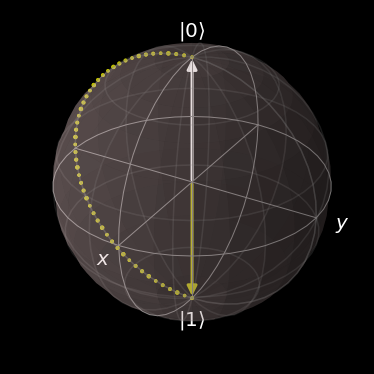

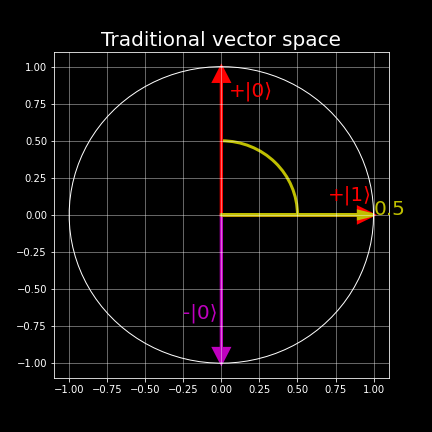

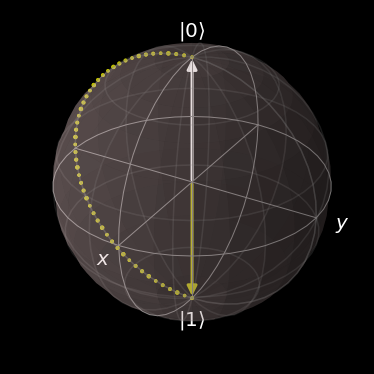

In [ ]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']

# Initialize the 'down' state
psi0 = spin_state(1/2, +1/2) 
print(psi0)

#Add initial vector to Bloch sphere
b.add_states(psi0)

# Twice as much rotation about the Bloch Sphere
Rotation = pi

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation about X axis in steps
  psi1 = rx(Rotation*delta[i]) * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1) 
print(psi1)

b.show()

from IPython.display import Image
Image('uc_pio2.png')

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.89100652]
 [ 0.4539905 ]]


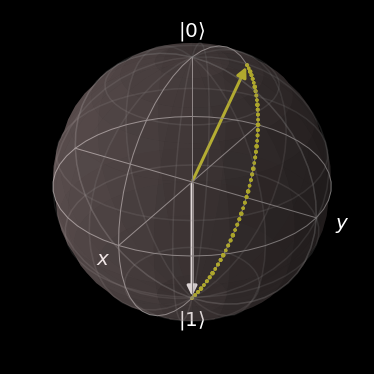

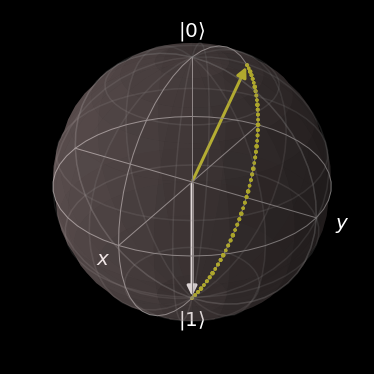

In [ ]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'

b.vector_color = ['w','y'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']

# Initialize the 'down' state
psi0 = spin_state( 1/2, -1/2) 
print(psi0)

#Add initial vector to Bloch sphere
b.add_states(psi0)

# Set rotation angle
Rotation = pi*.7

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation ( rx, ry, rz ) in steps
  psi1 = ry(Rotation*delta[i]) * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1) 
print(psi1)

b.show()

## Arbitrary angle of rotation

We can also rotate the state about the other axes of the Bloch Sphere.

Generically for any axis P = {X,Y,Z} on the Bloch Sphere:

\begin{aligned}
R_{p}(\theta )&=e^{(-i\theta P/2)}=\cos(\theta /2)I-i\sin(\theta /2)P \end{aligned}

##Pauli Matrices
\begin{aligned}
\sigma _{x}={\begin{pmatrix}0&1\\1&0\end{pmatrix}},\quad \sigma _{y}={\begin{pmatrix}0&-i\\i&0\end{pmatrix}},\quad \sigma _{z}={\begin{pmatrix}1&0\\0&-1\end{pmatrix}}
\end{aligned}

The rotations of the Bloch sphere about the Cartesian axes in the Bloch basis are then given by:

\begin{aligned}R_{x}(\theta )&=e^{(-i\theta X/2)}=\cos(\theta /2)I-i\sin(\theta /2)X={\begin{bmatrix}\cos \theta /2&-i\sin \theta /2\\-i\sin \theta /2&\cos \theta /2\end{bmatrix}}\\R_{y}(\theta )&=e^{(-i\theta Y/2)}=\cos(\theta /2)I-i\sin(\theta /2)Y={\begin{bmatrix}\cos \theta /2&-\sin \theta /2\\\sin \theta /2&\cos \theta /2\end{bmatrix}}\\R_{z}(\theta )&=e^{(-i\theta Z/2)}=\cos(\theta /2)I-i\sin(\theta /2)Z={\begin{bmatrix}e^{-i\theta /2}&0\\0&e^{i\theta /2}\end{bmatrix}}\end{aligned}


##Exercises to work out below: 

1. Try rotating about the Y axis. 

2. Try rotating about the Z axis.

3. Try out a few different angles of rotation (small, big, negative? [is that physical?]). 

4. Start with a different initial state.

5. Apply additional rotations about different axes and add each intermediate vector to the bloch sphere.

Save screen shots of your plots. 

Code to plot two Bloch spheres in subplots

### EXERCISE 5-9

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


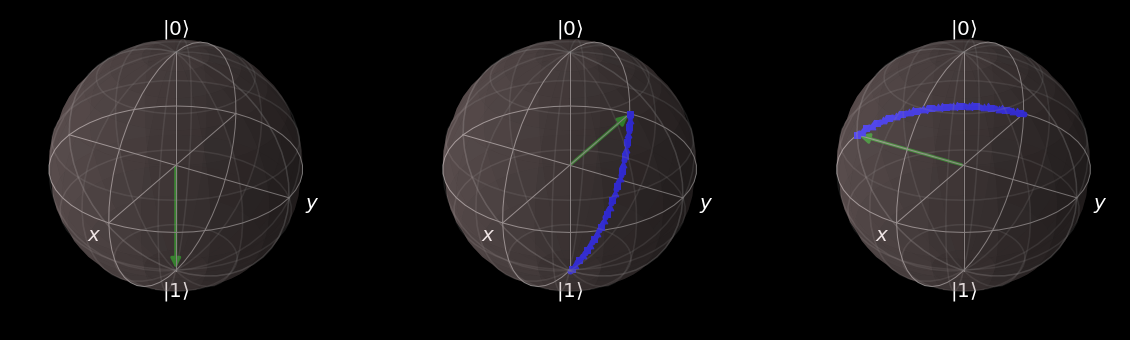

In [ ]:
# Exercise~! I reuse the code from the example above of constructing a bloch sphere
# System. 
# But I will change the rotating factors here:

# Rotate about Y axis for pi/2 and rotate about Z axis for pi/2.

## initialize Bloch spheres
fig = plt.figure(figsize=(20.0, 6))
#Bloch sphere 1
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.title.set_text('Original State')
b1 = Bloch(fig=fig, axes=ax1)
b1.font_color = 'white'
#Bloch sphere 2
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.title.set_text('Rotate pi/2 by rY')
b2 = Bloch(fig=fig, axes=ax2)
b2.font_color = 'white'
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.title.set_text('Rotate pi/2 by rZ')
b3 = Bloch(fig=fig, axes=ax3)
b3.font_color = 'white'

# Initialize the 'down' state
psi0 = spin_state( 1/2, -1/2) 
print(psi0)

# add to 1st Bloch Sphere
b1.add_states(psi0)

# Set rotation angle
Rotation = pi/2

delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation ( rx, ry, rz ) in steps
  psi1 = ry(Rotation*delta[i]) * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b2.add_points(pnts, meth = 'm')

  psi1final = ry(Rotation)*psi0

  psi2 = rz(Rotation*delta[i]) * psi1final
  pnts2 = [expect(sigmax(),psi2), expect(sigmay(),psi2), expect(sigmaz(),psi2)]
  b3.add_points(pnts2, meth = 'm')
# add to 2nd Bloch Sphere
b2.add_states(psi1)
b3.add_states(psi2)

b1.render()
b2.render()
b3.render()
# b1.render(fig=fig, axes=ax1)
# b2.render(fig=fig, axes=ax2)
plt.show()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


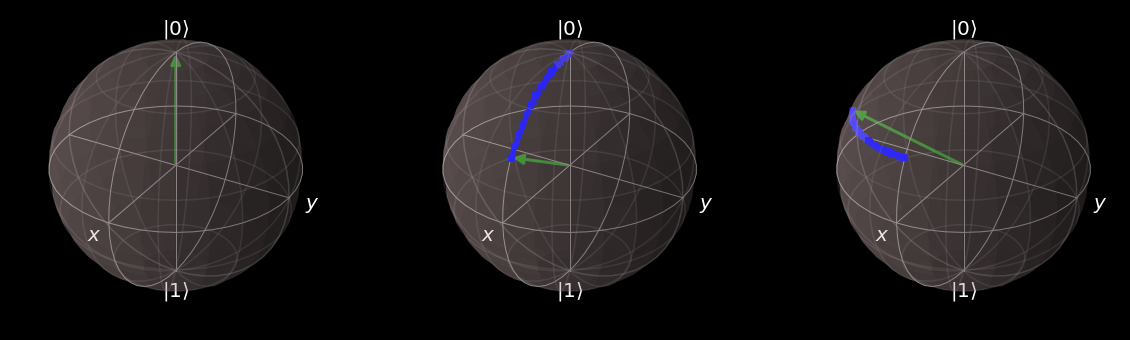

In [ ]:
# Exercise~! I reuse the code from the example above of constructing a bloch sphere
# System. 
# But I will change the rotating factors here:

# Start with a new initial state: instead of |1⟩, i use |0⟩
# Use different angles of rotation: I use pi/3 and -pi/3.
# Additional rotation: I seems to be doing this from beginning haha : )

## initialize Bloch spheres
fig = plt.figure(figsize=(20.0, 6))
#Bloch sphere 1
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.title.set_text('Original State')
b1 = Bloch(fig=fig, axes=ax1)
b1.font_color = 'white'
#Bloch sphere 2
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.title.set_text('Rotate pi/3 by rY')
b2 = Bloch(fig=fig, axes=ax2)
b2.font_color = 'white'
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.title.set_text('Rotate -pi/3 by rZ')
b3 = Bloch(fig=fig, axes=ax3)
b3.font_color = 'white'

# Initialize the 'down' state
psi0 = spin_state(1/2, 1/2) 
print(psi0)

# add to 1st Bloch Sphere
b1.add_states(psi0)

# Set rotation angle
Rotation1 = pi/3
Rotation2 = -pi/3

delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation ( rx, ry, rz ) in steps
  psi1 = ry(Rotation1*delta[i]) * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b2.add_points(pnts, meth = 'm')

  psi1final = ry(Rotation1)*psi0

  psi2 = rz(Rotation2*delta[i]) * psi1final
  pnts2 = [expect(sigmax(),psi2), expect(sigmay(),psi2), expect(sigmaz(),psi2)]
  b3.add_points(pnts2, meth = 'm')
# add to 2nd Bloch Sphere
b2.add_states(psi1)
b3.add_states(psi2)

b1.render()
b2.render()
b3.render()
# b1.render(fig=fig, axes=ax1)
# b2.render(fig=fig, axes=ax2)
plt.show()

# Superposition

What does the vector represent when it is rotated somewhere between up and down?

The state vector Ψ represents a superposition of the basis states |0⟩ and |1⟩.

$|Ψ⟩ = α |0⟩ + β |1⟩ $

We can parametrize the state in terms of this angle from pole to pole (theta = $θ$ ) where:

$α = \cos (θ/2) ~,~  β = \sin ( θ/2)$

Constrained by $θ$ only going to $π$ : $( 0 ≤ θ ≤ π )$ . 

>(Remember that this is why rotation back to the top of the Bloch sphere actually brings us to the negative projection of the original basis state, not back to the original state). As soon as we go past π the projection to the other state (β) decreases and the projection to the original state (α) begins increasing again.

Parameterized the state vector becomes:

$Ψ = \cos (\frac{θ}{2}) |0⟩ + \sin ( \frac{θ}{2}) |1⟩ $

To be complete we must also include a relative phase between the two states represented by that rotation angle about the Z axis $ϕ$ where $( 0 ≤ ϕ ≤ 2π )$ :

$Ψ = \cos (\frac{θ}{2}) |0⟩ + e^{iϕ} \sin ( \frac{θ}{2}) |1⟩ $

## Equal superposition states

As an example imagine we rotate a state vector so it is entirely along the 'X' axis (by giving it a quarter turn about the Y axis for instance).

Then it will be in an equal superposition of the basis states such that $α = β$. 

For this to be true the total probability of the state existing must be normalized to 1. Requiring that $⟨Ψ|Ψ⟩=1$. 

In which case $α = β = \frac{1}{\sqrt{2}}$ and

$|Ψ⟩ = α |0⟩ + β |1⟩ = \frac{1}{\sqrt{2}}( |0⟩ + |1⟩ )$

**Exercise**: Verify that $⟨Ψ|Ψ⟩=1$, for $|Ψ⟩ = \frac{1}{\sqrt{2}}( |0⟩ + |1⟩ )$


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]


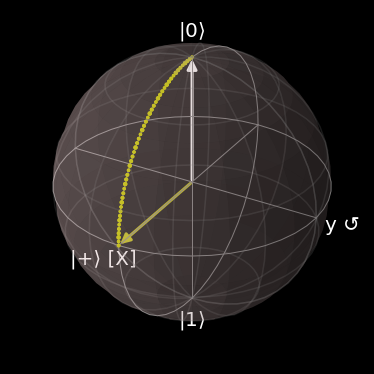

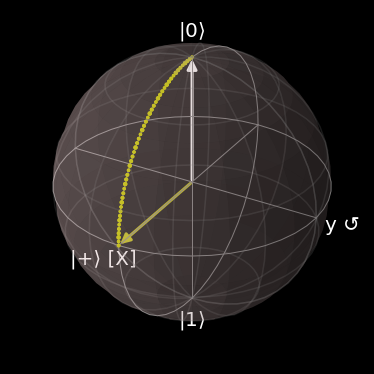

In [ ]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']
b.ylabel = ['y $ \circlearrowleft $', '']
b.xlabel = ['|+⟩ [X]', '']

# Initialize the 'down' state
psi0 = spin_state( 1/2, +1/2) 
print(psi0)

#Add initial vector to Bloch sphere
b.add_states(psi0)

# Twice as much rotation about the Bloch Sphere
Rotation = pi*1/2

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation ( rx, ry, rz )
  psi1 = ry(Rotation*delta[i]) * psi0

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1) 
print(psi1)

b.show()

### The |+⟩ state in the X basis
This vector is composed of 1/2 of the up state vector and 1/2 of the down state vector with the same sign. 

$|+⟩ = \frac{1}{\sqrt{2}}  ( |0⟩ + |1⟩ )$

It is in an equal superposition of the up and down state.
The square root ensures that $⟨+|+⟩=1$ 

Exercise: Check $⟨+|+⟩=1~~$, (i.e. $~\frac{1}{\sqrt{2}}  ( ⟨0| + ⟨1| ) * \frac{1}{\sqrt{2}}  ( |0⟩ + |1⟩ ) = ? $)


---


Next:
If we rotate |+⟩ around Z (or Y) to the other side of the Bloch sphere what vector do we get?


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.-0.70710678j]
 [0.+0.70710678j]]


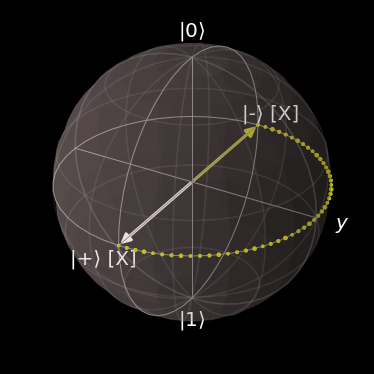

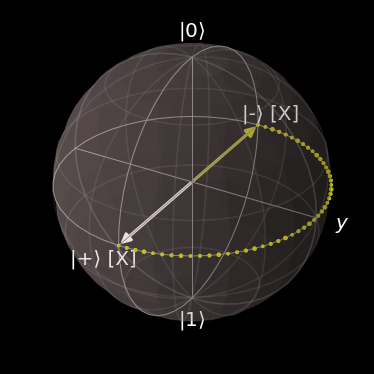

In [ ]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']
b.xlabel = ['|+⟩ [X]', '|-⟩ [X]']

# Initialize the 'x+' state
x = (basis(2,0)+(1+0j)*basis(2,1)).unit()
print(x)
b.add_states(x)

# Twice as much rotation about the Bloch Sphere
Rotation = pi*1

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation ( rx, ry, rz )
  psi1 = rz(Rotation*delta[i]) * x

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1) 
print(psi1)

b.show()

### The |-⟩ state in the X basis
This vector is also composed of 1/2 of the up state and 1/2 of the down state but now they are out of phase with each other so one is always negative of the other.

$|-⟩ = \frac{1}{\sqrt{2}}  ( |0⟩ - |1⟩ )$

What happens when we rotate this state about the X axis?


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.+0.70710678j]
 [0.-0.70710678j]]


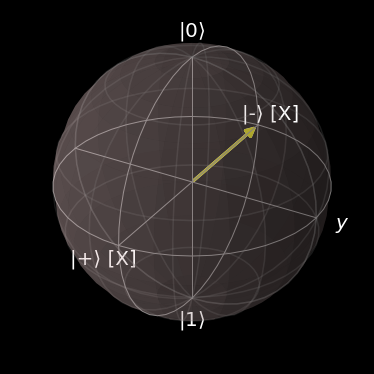

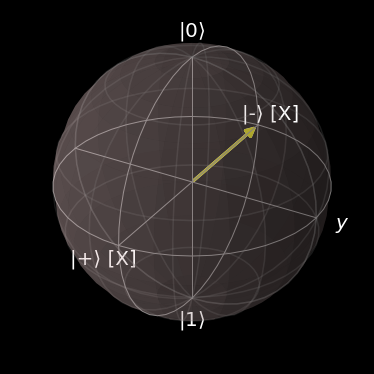

In [ ]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y','y'] #set color of initial and final vectors
b.xlabel = ['|+⟩ [X]', '|-⟩ [X]']

x_minus = (basis(2,0)-(1+0j)*basis(2,1)).unit()
print(x_minus)
b.add_states(x_minus)

#Apply rotation
psi1 = rx(pi*1) * x_minus
print( psi1 )
b.add_states(psi1)

b.show()

The global phase of the state changed but the relative phase of the superposition did not. 

>Exercise: Create a new cell. Next create a state that is not a pure |-⟩ and rotate it about the X axis. 

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.78086881]
 [-0.62469505]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.+0.62469505j]
 [0.-0.78086881j]]


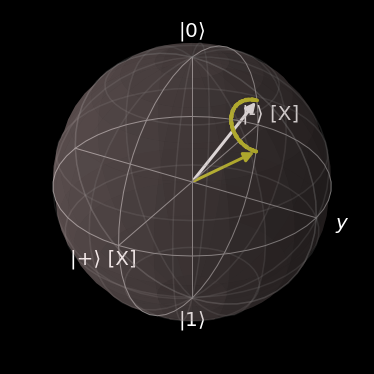

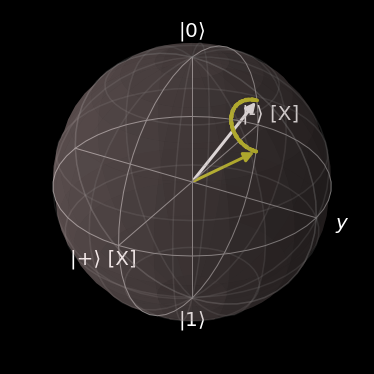

In [ ]:
'''
For Exercise
'''
# I also reuse the above construction for bloch sphere.


b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','y'] #set color of initial and final vectors
b.point_color = ['y']
b.point_marker = ['.']
b.xlabel = ['|+⟩ [X]', '|-⟩ [X]']

# Initialize the 'x-' state
xminus = (basis(2,0)-(1+0j)*basis(2,1)).unit()
xplus = (basis(2,0)+(1+0j)*basis(2,1)).unit()
notpure = (0.1*xplus + 0.9*xminus).unit()
print(notpure)
b.add_states(notpure)

# Twice as much rotation about the Bloch Sphere
Rotation = pi*1

#Loop - to plot points along rotation arc
delta = np.linspace(0, 1, 50)
for i in range(len(delta)):

  #Apply rotation ( rx, ry, rz )
  psi1 = rx(Rotation*delta[i]) * notpure

  #Add points to Bloch sphere
  pnts = [expect(sigmax(),psi1), expect(sigmay(),psi1), expect(sigmaz(),psi1)]
  b.add_points(pnts)

#Add final vector to Bloch sphere
b.add_states(psi1) 
print(psi1)

b.show()

##Superposition of X basis back to Z basis

What happens now if we create an equal super position of the |+⟩ and |-⟩ states?

$ \frac{1}{\sqrt{2}} (|+⟩ + |-⟩)= \frac{1}{2}  ( |0⟩ + |1⟩ ) + \frac{1}{2}  ( |0⟩ - |1⟩ ) = |0⟩ $

##We get |0⟩ ,  the Z 'plus' state 
This is very interesting. Remember we constructed our |+⟩ and |-⟩ states from |0⟩ + |1⟩ states. We created a superposition that was in phase |0⟩ + |1⟩ to create |+⟩ and a superposition that was out of phase |0⟩ - |1⟩ to create |-⟩.

We now find that if we want to get back to our initial basis we reverse the process. A superposition of |+⟩ + |-⟩ (in phase) creates the |0⟩ ( along positive Z) and a superposition |+⟩ - |-⟩ (out of phase) creates the -|1⟩ ( along negative Z, and now with a global phase).

It is extremely important to recognize:
**All basis states can be decomposed as a superposition of the other basis states.**
 
This is exactly what is demonstrated by the Stern–Gerlach Experiment (#2)
(https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment#Experiment_2)

The Stern-Gerlach experiment is a fundamental experiment in Quantum physics history. It showed that the orientation of spin is quantized, even if from a seemingly random source. Further, it showed that if a 'beam' of up spins in one basis is subsequently measured in a different basis that it splits into two equal beams. Just like we showed with $\frac{1}{\sqrt{2}} (|+⟩ + |-⟩)= |0⟩$ but in reverse! There are many instances of this in quantum physics for various other two level quantum systems. 

Light polarization for instance behaves in a similar fashion, with vertical and horizontal polarizations both being equal superpositions of left and right handed circularly polarized light. This will be important once we discuss atoms later.

**Exercise**: Verify that $ \frac{1}{\sqrt{2}} (|+⟩ - |-⟩) = -|1⟩ $

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


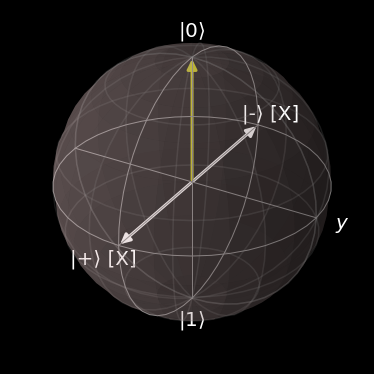

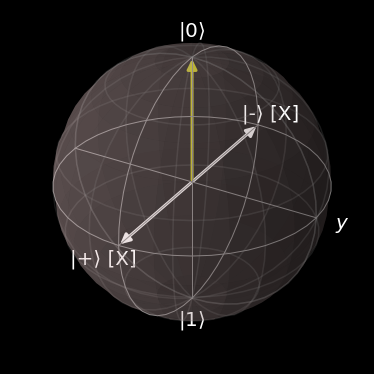

In [ ]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','w','y'] #set color of initial and final vectors
b.xlabel = ['|+⟩ [X]', '|-⟩ [X]']

'''
Create X+ and X- states
'''
x_plus = (basis(2,0)+(1+0j)*basis(2,1)).unit()
x_minus = (basis(2,0)-(1+0j)*basis(2,1)).unit()

print(x_plus)
b.add_states(x_plus)
print(x_minus)
b.add_states(x_minus)

'''
Super position |+⟩ + |-⟩ normalized = |0⟩
'''
psi1 = (x_plus + x_minus).unit()
# psi2 = (x_plus + x_minus)
print( psi1 )
b.add_states(psi1)
# b.add_states(psi2)

b.show()

>Execise: Go back and plot the super position of |+⟩ and |-⟩ without normalizing.

Reminder of the 'Z' basis states

$|{\uparrow} \rangle = |0 \rangle = \begin{bmatrix}{1}\\{0}\end{bmatrix}=\left\vert {s_{z}{=}{+\textstyle {\frac {1}{2}}}}\right\rangle $

$|{\downarrow} \rangle = |1\rangle = \begin{bmatrix}{0}\\{1}\end{bmatrix}
=\left\vert {s_{z}{=}{-\textstyle {\frac {1}{2}}}}\right\rangle $


###Basis along Y

Finally we can also define the basis along the 'Y' direction.
They are also orthogonal to each other.
We can represent this new vector in terms of the original Z basis.

$|+i⟩ =\frac{1}{\sqrt{2}} (|0⟩  + i|1⟩)$

$|-i⟩ =\frac{1}{\sqrt{2}} (|0⟩  - i|1⟩)$

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


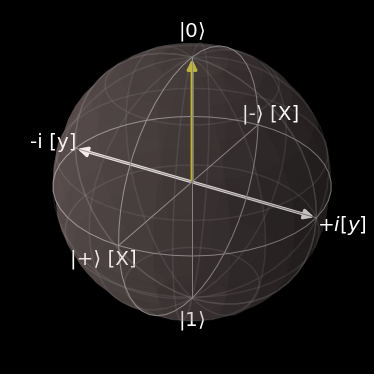

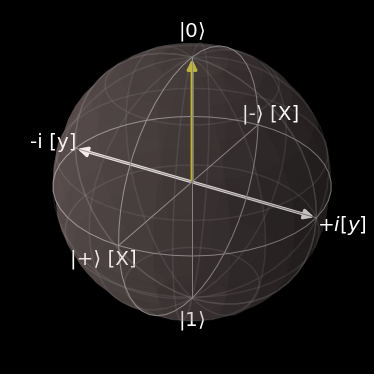

In [ ]:
b = Bloch() #create Bloch sphere
b.font_color = 'white'
b.vector_color = ['w','w','y'] #set color of initial and final vectors
b.xlabel = ['|+⟩ [X]', '|-⟩ [X]']
b.ylabel = ['$+i [y]$', '-i [y]']

y_plus = (basis(2,0)+(0+1j)*basis(2,1)).unit()
b.add_states(y_plus)
print(y_plus)

y_minus = (basis(2,0)-(0+1j)*basis(2,1)).unit()
b.add_states(y_minus)
print(y_minus)

#Superposition in phase
psi1 = (y_plus + y_minus).unit()

b.add_states(psi1)
print(psi1)
b.show()


#Superposition of Y basis states

We again see that an in phase superposition of |+i⟩ + |-i⟩  = |0⟩ and an out of phase superposition of |+i⟩ - |-i⟩  = |1⟩

So not only are the original Z basis states superpositions of the |+⟩,|-⟩ basis states (along X) but also simultaneously of the basis states |+i⟩,|-i⟩ along y. 

But how do we check? We must measure!

#State Measurement

Measurement is an important concept in quantum mechanics. Imagine that we want to measure the qubit state after a rotation to verify that we have rotated it to another state. What do we **expect** to measure (what is the expectation value)? 

We know quantum states are quantized. An electron can only ever be in one state or the other and a photon can only ever be in one cavity or the other. However, it can have a probability of being in both one *and* the other before we measure it. 

It is like a coin that can only be heads or tails once it falls (never landing on edge) but while it is in the air has some probability of being both. If the qubit is 'flipped' into an equal superposition of up and down (like a coin) it will be up 50% of the time and down 50% of the time but it can only ever land heads/tails (up/down). 

On the Bloch sphere we can see that the probability of being in each state is related to the projection of the state vector along the z axis. If the state (vector) is pointing up then it is more likely to be measured up. If it is pointing down then down. And if it is sideways (no component in the z direction) then it is in an equal superposition of up and down. 

However, we need some observable or measureable value to determine which state we were in. For the electron this observable is the spin. The spin project operator is :

$S_z = \frac{\hbar}{2} \sigma _z  = \frac{\hbar}{2}  \begin{pmatrix}
1&0\\ 0&-1 \end{pmatrix} $

It projects the state onto the Z basis and multiplies by ±ħ/2 depending on the state. Now the superposition tells us the probability that we'll get ±ħ/2. 

For spin down:

$S_z |\Psi_0⟩ = \frac{\hbar}{2} \sigma _{z} |\downarrow ⟩ = \frac{\hbar}{2}  {\begin{pmatrix}1&0\\0&-1\end{pmatrix}} \begin{pmatrix}{0}\\{1}\end{pmatrix} = \frac{\hbar}{2} [(1 * 0) + (0*1) + (0 * 0) + (-1 * 1)] = -\frac{\hbar}{2}  $


###Pauli Matrices:

If we want to measure along other bases we'd have to use the other Pauli matrices. 

$\sigma _{x}={\begin{pmatrix}0&1\\1&0\end{pmatrix}},\quad \sigma _{y}={\begin{pmatrix}0&-i\\i&0\end{pmatrix}},\quad \sigma _{z}={\begin{pmatrix}1&0\\0&-1\end{pmatrix}}$

###Measurement trials (repeating for statistics)

So now if we create a superposition state: 
$|+⟩ = \frac{1}{\sqrt{2}}  ( |0⟩ + |1⟩ )$

We can measure it and repeat the process 100 times. 
How many times do we get up and down?

First we need to be very explicit about how we are going to measure it. If we create an equal superposition of the basis states along Z (|0⟩ and |1⟩), then we'll only get an equal probability of measuring ±ħ/2 if we measure along Z.
(If we measure along X we will **always** get +ħ/2.)

First measuring along Z:

{1.0: 46, -1.0: 54}


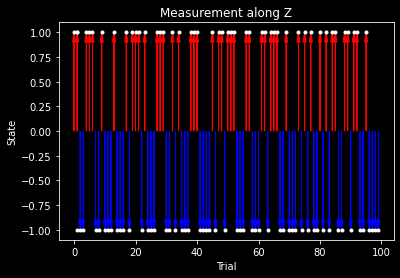

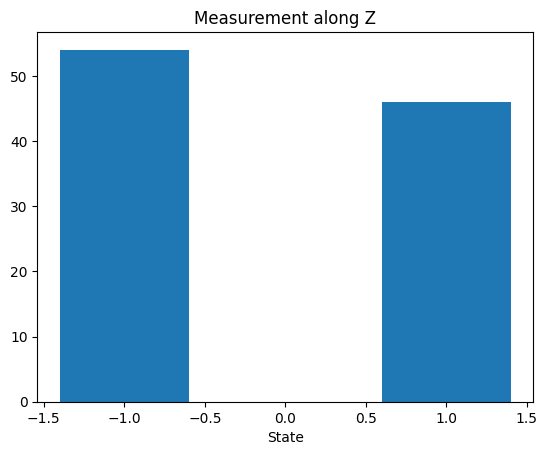

In [ ]:
from qutip.measurement import measure, measurement_statistics

trials = 100

# Prepare |+X⟩ state
psi1 = (basis(2,0) + basis(2,1) ).unit()

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')
axes.plot(1, 1,'.w')
axes.plot(1, -1,'.w')
for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure. 
  Here the state is psi1 and the basis is along Z.
  '''
  value, new_state = measure(psi1, sigmaz())
  results[round(value)] += 1
  if value > 0: 
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)

print(results)
plt.title('Measurement along Z')
plt.ylabel('State')
plt.xlabel('Trial')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along Z')
plt.xlabel('State')
plt.show()

Now Measure along X:

{1.0: 100, -1.0: 0}


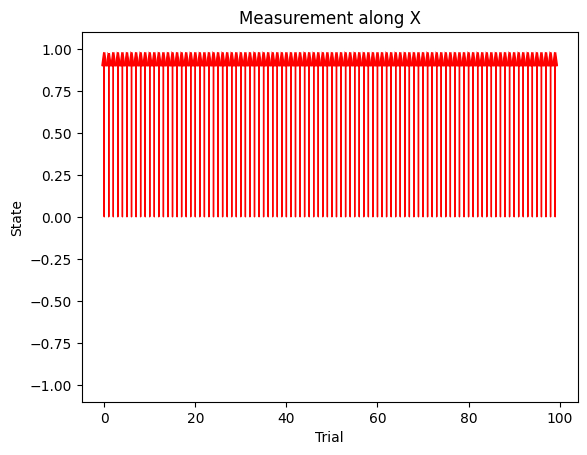

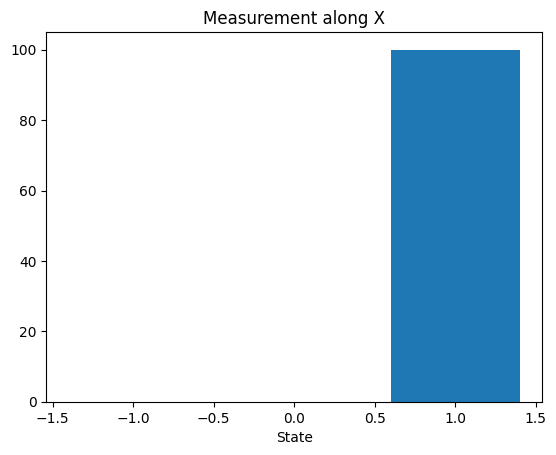

In [ ]:
from qutip.measurement import measure, measurement_statistics

trials = 100

# Prepare |+⟩ state
psi1 = (basis(2,0) + basis(2,1) ).unit()

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')

for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure. 
  Here the state is psi1 and the basis is along X.
  '''
  value, new_state = measure(psi1, sigmax())
  results[round(value)] += 1
  axes.plot(1, 1,'.w')
  axes.plot(1, -1,'.w')
  if value > 0: 
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)

print(results)
plt.title('Measurement along X')
plt.ylabel('State')
plt.xlabel('Trial')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along X')
plt.xlabel('State')
plt.show()


# axes.set_xlabel(r't [$\pi$]', fontsize=20)
# axes.set_ylabel(r'spin state', fontsize=20)

# axes.legend(("Up=blue", "Down=red"),loc=2)


We've shown a very interesting connection between the real 3D world and this quantum state world in that they both fit on the Bloch sphere.
Measuring states along X or Y in real space can be respresented by superposition of vectors on the Bloch sphere.

To dig deeper you can look into the fact that SU(2) is isomorphic to SO(3). 

SU(2) - Special Unitary group (degree 2) - vector state space of qubits on the Bloch sphere.

SO(3) - Special orthogonal group in 3 Dimensions - directions in 3D, aka a real sphere.

https://en.wikipedia.org/wiki/Special_unitary_group#The_group_SU(2)



###Exercises: 
1. Go back and verify that the superpositions you create with state rotation match the measurements. 
2. Create an equal 50/50 superposition of up and down. Rotate this superposition around the Z axis. Does it change the probabilities?
3. When would rotation about the Z axis matter? What is the physical analog to the Mach Zehnder interferometer?


In [ ]:
# Exercise 1:
# Verify that the two vectors for 'up' and 'down' are orthogonal by multiplying them together to project them onto each other.

ket_up = spin_state(1/2, +1/2)
ket_down = spin_state(1/2, -1/2)
bra_up = spin_state(1/2, +1/2, type="bra")
bra_down = spin_state(1/2, -1/2, type="bra")

# If they are orthogonal to each other, the projection of one on another, 
# also known as the probability of one in another, operated as inner product,
# should be both zero/0.
print(bra_up*ket_down)
print(bra_down*ket_up)

# Since both are zero, so they are orthogonal.

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]


In [ ]:
# Exercise 2:
# Try out (apply) the NOT operator on both the |0⟩ and |1⟩ states. Show your work (written out by hand).

# This is written by hand.

In [ ]:
# Exercise 3:
# Verify by hand that this rotation (about X) transforms the state |↑⟩= (1) into (0)
#                                                                       (0)      (i)

# This is Written by hand.

In [ ]:
# Exercise 4:
# Verify that the expectation values will be the same for ±|0⟩

# This is Written by hand.

In [ ]:
# Exercise 5:
# Try rotating a state vector about the Y axis.

# See Above

In [ ]:
# Exercise 6:
# Try rotating a state vector about the Z axis.

# See Above

In [ ]:
# Exercise 7:
# Try out a few different angles of rotation (small, big, negative?) Is a negative rotation physical?

# See Above

In [ ]:
# Exercise 8:
# Start with a different initial state and perform a rotation.

# See Above

In [ ]:
# Exercise 9:
# Apply additional rotations about different axes and add each intermediate vector to the Bloch sphere.

# See Above

In [ ]:
# Exercise 10:
# Verify that ⟨𝜓|𝜓⟩=1, for |𝜓⟩=1/sqrt(2)(|0⟩+|1⟩)

# This also is written by hand.

psiket = (1/sqrt(2))*(spin_state(1/2, +1/2) + spin_state(1/2, -1/2))
psibra = psiket.dag()

print(psibra*psiket)

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]


In [ ]:
# Exercise 11:
# Check ⟨+|+⟩=1 . That is, evaluate 1/sqrt(2)(⟨0|+⟨1|)∗ 1/sqrt(2)(|0⟩+|1⟩)=?

# This is also written by hand.

plusket = (1/sqrt(2))*(spin_state(1/2, +1/2) + spin_state(1/2, -1/2))
plusbra = plusket.dag()

print(plusbra*plusket)

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]


In [ ]:
# Exercise 12:
# Create a new cell. Next create a state that is not a pure |-⟩ and rotate it about the X axis.

# See Above

In [ ]:
# Exercise 13:
# How do we decompose the -|1⟩ state into the basis |+⟩ and |-⟩ ?

# Verify that  1/√2(|+⟩−|−⟩)=−|1⟩
# This is written by hand.

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
{1.0: 100, -1.0: 0}


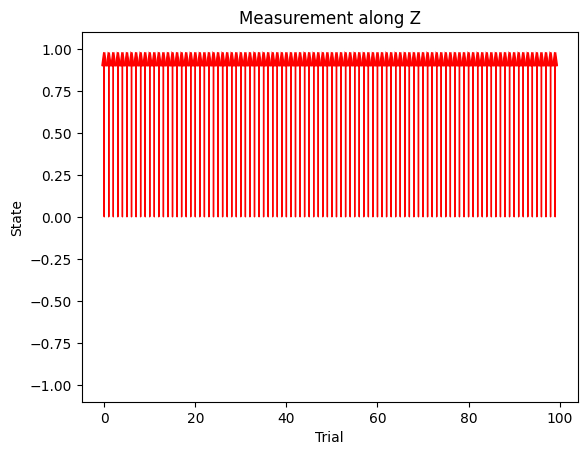

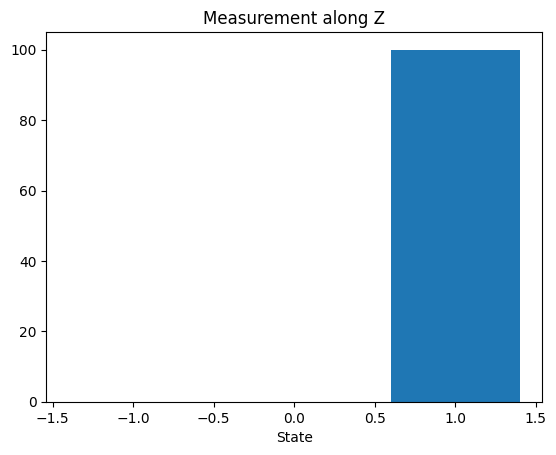

In [ ]:
# Exercise 14: 
psi = spin_state(1/2,+1/2)
print(psi)
# should be 100/0

from qutip.measurement import measure, measurement_statistics

trials = 100

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')
axes.plot(1, 1,'.w')
axes.plot(1, -1,'.w')
for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure. 
  Here the state is psi1 and the basis is along Z.
  '''
  value, new_state = measure(psi, sigmaz())
  results[round(value)] += 1
  if value > 0: 
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)

print(results)
plt.title('Measurement along Z')
plt.ylabel('State')
plt.xlabel('Trial')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along Z')
plt.xlabel('State')
plt.show()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]
{1.0: 41, -1.0: 59}


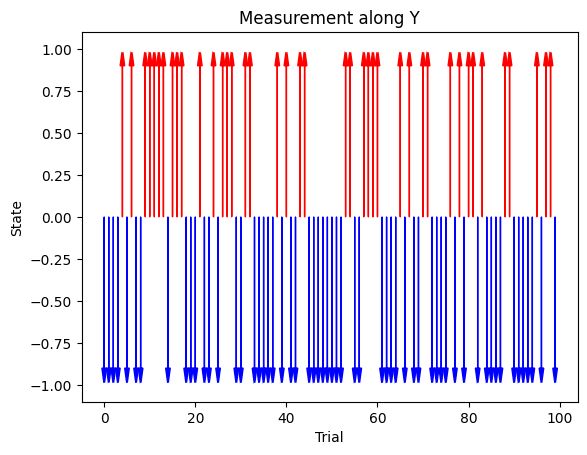

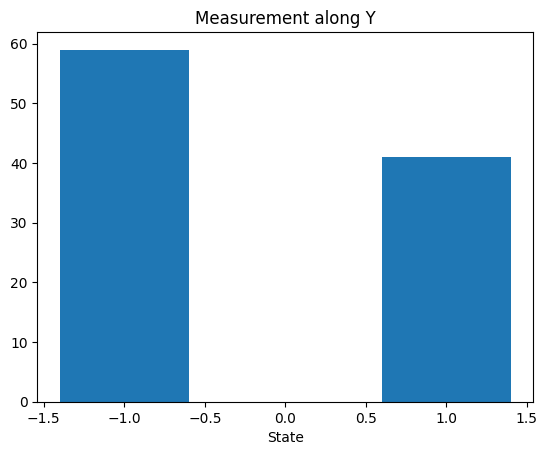

In [ ]:
# Exercise 14:
# Go back and verify that a few of the superpositions you created by rotating states match the measurements.

psi0 = spin_state(1/2, +1/2)  #|0⟩
psi1 = ry(pi/2) * psi0
print(psi1)  # |-i⟩ = 1/√2(|0⟩−i|1⟩)

# Should give us half half result!


from qutip.measurement import measure, measurement_statistics

trials = 100

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')
axes.plot(1, 1,'.w')
axes.plot(1, -1,'.w')
for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure. 
  Here the state is psi1 and the basis is along Z.
  '''
  value, new_state = measure(psi1, sigmay())
  results[round(value)] += 1
  if value > 0: 
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)

print(results)
plt.title('Measurement along Y')
plt.ylabel('State')
plt.xlabel('Trial')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along Y')
plt.xlabel('State')
plt.show()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]
{1.0: 56, -1.0: 44}


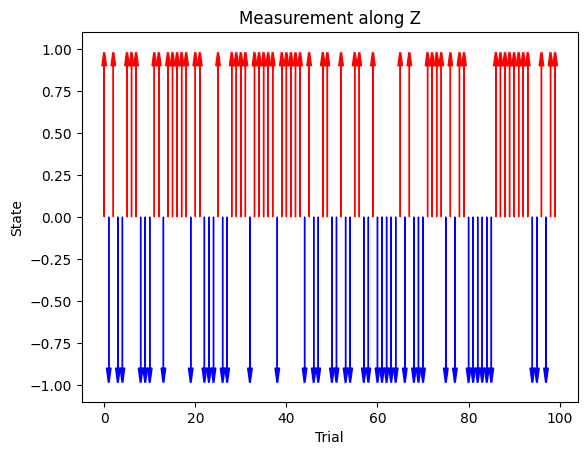

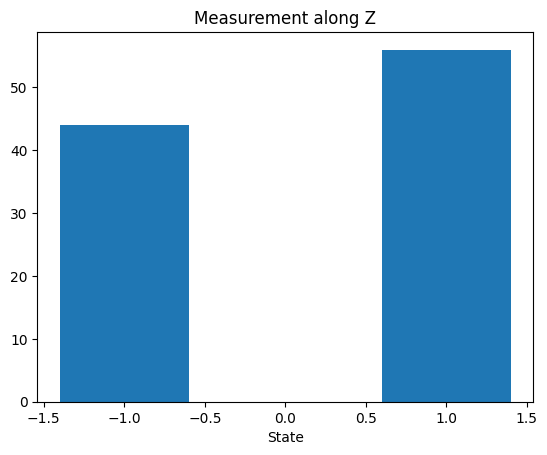

In [ ]:
# Exercise 15:
# Create an equal 50/50 superposition of up and down. Rotate this superposition around the Z axis. Does it change the probabilities?


zplus = spin_state(1/2, +1/2)
zminus = spin_state(1/2, -1/2)
psi1 = (zplus+zminus).unit()
print(psi1)  

# Should give us 50/50 result!


from qutip.measurement import measure, measurement_statistics

trials = 100

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')
axes.plot(1, 1,'.w')
axes.plot(1, -1,'.w')
for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure. 
  Here the state is psi1 and the basis is along Z.
  '''
  value, new_state = measure(psi1, sigmaz())
  results[round(value)] += 1
  if value > 0: 
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)

print(results)
plt.title('Measurement along Z')
plt.ylabel('State')
plt.xlabel('Trial')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along Z')
plt.xlabel('State')
plt.show()


Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.5-0.5j]
 [0.5+0.5j]]
{1.0: 53, -1.0: 47}


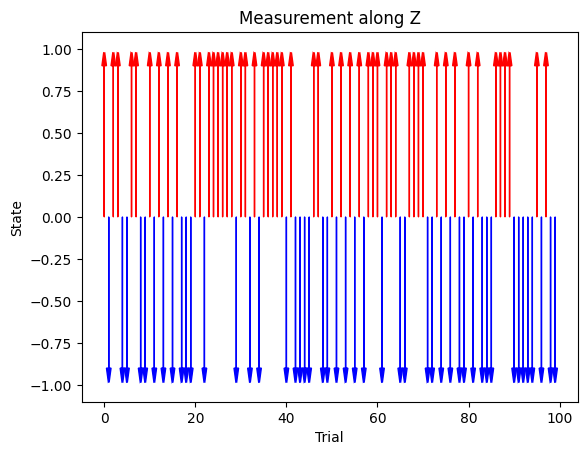

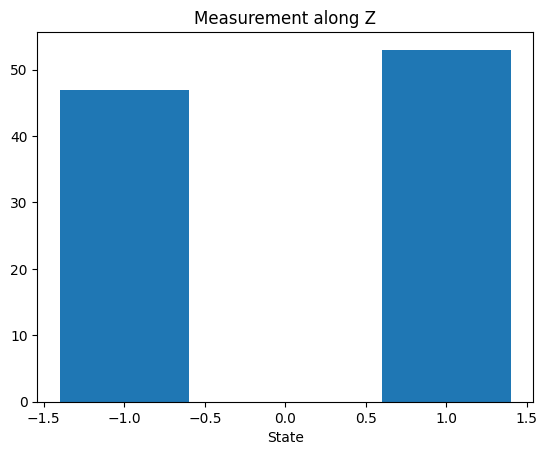

In [ ]:
# Exercise 15:
# Create an equal 50/50 superposition of up and down. Rotate this superposition around the Z axis. Does it change the probabilities?


zplus = spin_state(1/2, +1/2)
zminus = spin_state(1/2, -1/2)
psi1 = (zplus+zminus).unit()
psi2 = rz(pi/2) * psi1
print(psi2)  

# Result shouldn't change!


from qutip.measurement import measure, measurement_statistics

trials = 100

results = {1.0: 0, -1.0: 0}  # 1 and -1 are the possible outcomes

fig, axes = plt.subplots(1,1)
plt.style.use('default')
axes.plot(1, 1,'.w')
axes.plot(1, -1,'.w')
for i in range(trials):
  '''
  The Measure function needs the state and the basis to measure. 
  Here the state is psi2 and the basis is along Z.
  '''
  value, new_state = measure(psi2, sigmaz())
  results[round(value)] += 1
  if value > 0: 
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='r', ec='r', length_includes_head = 1)
  else:
    axes.plot(i, value,'.w')
    plt.arrow(i,0,0,value,linewidth=1,head_width=1, head_length=0.1, fc='b', ec='b', length_includes_head = 1)

print(results)
plt.title('Measurement along Z')
plt.ylabel('State')
plt.xlabel('Trial')
plt.show()

fig, axes = plt.subplots(1,1)
plt.bar(list(results.keys()), results.values())
plt.title('Measurement along Z')
plt.xlabel('State')
plt.show()


In [ ]:
# Exercise 16:
# When would rotation about the Z axis matter? What is the physical analog to the Mach Zehnder interferometer?


Exercise 16: 
 
result of rotation on z axis matter when measurement is not on z. (If the state is on z axis, say |0⟩ |1⟩ -|0⟩ -|1⟩, no matter how we rotate by z-axis, the result won't change).

The physical is analog to the Mach Zehnder interfermometer is the three Pauli gates.



#References:

https://qutip.org/docs/latest/guide/guide-bloch.html


https://en.wikipedia.org/wiki/Hilbert_space#Quantum_mechanics

